In [196]:
import pandas as pd

import numpy as np
from numpy.random import randn
np.random.seed(101)

import matplotlib.pyplot as plt

import seaborn as sns

#To import stata file
import pyreadstat


# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

# Importing libraries for building logistic regression model using statsmodels library
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score, precision_recall_curve

from sklearn import linear_model

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### Read the Dataset Boston.csv

In [2]:
Data_set= pd.read_csv('Boston.csv')

#### Print the first and last 5 rows of the dataset

In [3]:
# Displaying first ten rows
Data_set.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


In [4]:
# Displaying last ten rows
Data_set.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


In [5]:
# Copying data to another variable to avoid any changes to original data
df1= Data_set.copy()

In [6]:
# Understanding the shape, null values and Data TYpes of the dataset:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


***There are no null values present in the dataset. The dataset has one categorical attribute that is 'CHAS' others are numeric and shape of the dataset is (506 x 13)

In [13]:
#To find the null values for all the attributes:
(df1.isnull().sum())    

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

No null value for any of the attributes

In [14]:
# The numerical and continuous attributes are:
num_cols= ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT','MEDV']

### Analyze Summary Statistics of the dataset:

    Analyze the summary statistics for numerical variables

In [15]:
df1[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
PTRATIO,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000


### Attribute Information:

1. CRIM: Mean of Per capita crime rate by town is 3.6 but a maximum rate of ~88 crimes have also been reported.
2. ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.: Avg is ~11%. 0% of residential land were zoned for 50%         of lots.
3. INDUS: Proportion of non-retail business acres per town: Avg is 11.2%. The range varies from 0.46% to max 27%
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise): 75% of the tract does not bound the Charles              river.
5. NOX: Nitric Oxide concentration (parts per 10 million): Avg. NO2 concentration is 0.5 parts per million.
6. RM: The average number of rooms per dwelling is ~6 (for 75% of dwellings), only 25% of dwellings has ~8 rooms per dwelling.
7. AGE: Proportion of owner-occupied units built before 1940: On an average ~70% of owner occupied buildings are built before         1940. Out of 75% buildings 94% are owner occupied buildings are built before 1940 i.e. majority of buildings are old ones.
8. DIS: Weighted distances to five Boston employment centers: The average distance is ~3.8 KM. But 50% of the towns or suburbs           are located within ~3 KMs. 
9. RAD: Index of accessibility to radial highways
10. TAX: Full-value property-tax rate per 10,000 dollars: Mean TAX is ~$408.
11. PTRATIO: Pupil-teacher ratio by town: Mean is ~18 and highest ratio is ~22.
12. LSTAT: % lower status of the population
13. MEDV: Median value of owner-occupied homes in 1000 dollars: Output Variable with mean value is ~22k dollars

In [9]:
df1.shape

(506, 13)

In [10]:
# Checking for duplicated values:
df1.duplicated().sum()

0

Zero  duplicate values present in the dataset

In [16]:
cat_cols= ['CHAS']

In [23]:
# Check summary for categorical data:

(df1[cat_cols]).value_counts(normalize= True)

CHAS
0       0.93083
1       0.06917
dtype: float64

#### Insights:
1. 93% of the houses are not around the Charles River. Only 0.06% of them are around Charles.

# Exploratory Data Analysis (EDA) and Visualization
### Univariate Analysis
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### 1. Univariate Analysis - Numerical Data

In [24]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(12,8), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    print('Skew:',round(feature.skew(),2))
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='cyan') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="pastel") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    #ax_box2.annotate(np.median(feature), (np.median(feature),-1),size=12)
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.nanmedian(feature), color='black', linestyle='-') # Add median to the histogram

### Using the above function, let's first analyze the Histogram and Boxplot for CRIM

Skew: 5.22


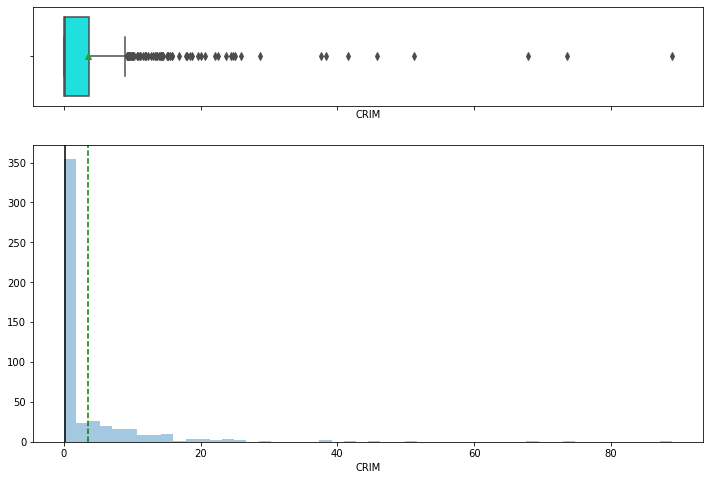

In [25]:
# Build the histogram boxplot for CRIM (Crime Rate Per Capita):
histogram_boxplot(df1['CRIM'])

#### Inference:
1. The CRIM curve is highly right skewed with multiple outliers.
2. The median of the CRIM is zero but the mean of per capita crime rate is ~3.6. For some town or suburb CRIM is very high ~40 that is alarming for that particular locality.
    

Skew: 2.23


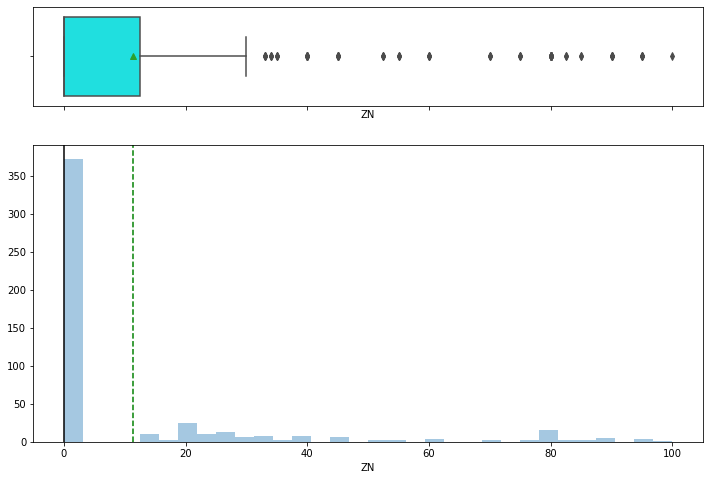

In [26]:
# Build the histogram boxplot for ZN (Proportion of residential land zoned for plots >25000 sq feet)
histogram_boxplot(df1['ZN'])

#### Inference:
1. The ZN curve is right skewed with multiple outliers.
2. The median of the ZN is zero that means majority of the towns or suburbs (50%) had 0% of residential land were zoned but the mean ZN is ~11%.

Skew: 0.3


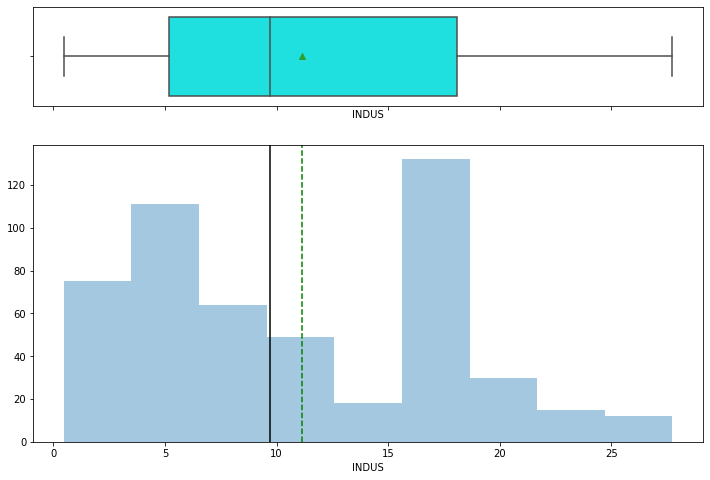

In [27]:
# Build the histogram boxplot for INDUS(Proportion of non-retail business acres per town):
histogram_boxplot(df1['INDUS'])

#INDUS: Proportion of non-retail business acres per town: Avg is 11.2%. The range varies from 0.46% to max 27%

#### Inference:
1. The INDUS curve is slightly right skewed.
2. Proportion of non-retail business acres per town: Avg is 11.2% but the median proportion is ~10%.

Skew: 0.73


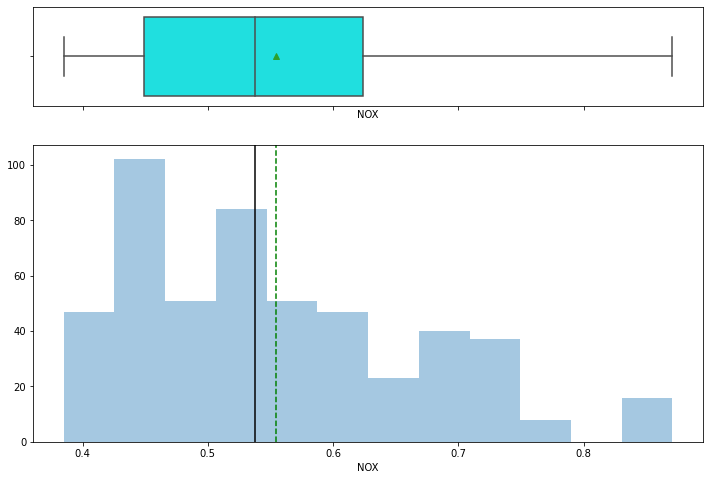

In [28]:
# Build the histogram boxplot for NOX(Nitric Oxide concentration (parts per 10 million):
histogram_boxplot(df1['NOX'])

### Inference:
1. The NOX curve is slightly righ skewed.
2. Avg. and median NO2 concentration is 0.5 parts per million only for the town and suburbs.

Skew: 0.4


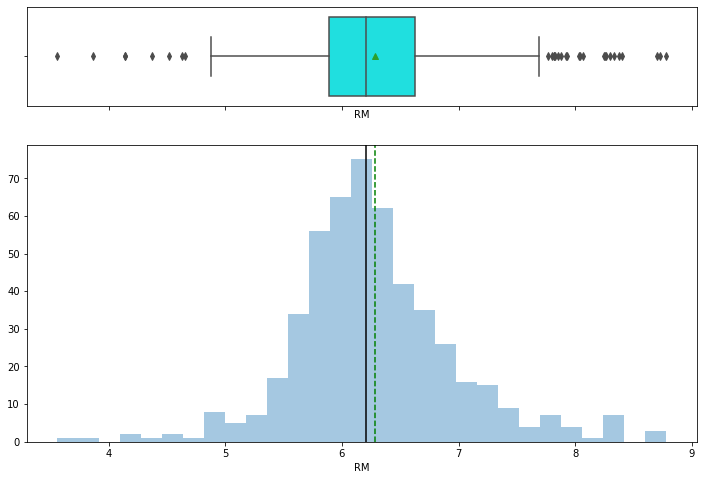

In [29]:
# Build the histogram boxplot for RM(The average number of rooms per dwelling):
histogram_boxplot(df1['RM'])

#6. RM: The average number of rooms per dwelling is ~6 (for 75% of dwellings), only 25% of dwellings has ~8 rooms per dwelling.


### Inference:
1. The RM graph is almost normally distributed with its box plot slightly right tilted with multiple outliers.
2. The mean of no of rooms per dwelling is ~6.
3. Some towns have more than 8 Rooms present in the house but their number is very less.

Skew: -0.6


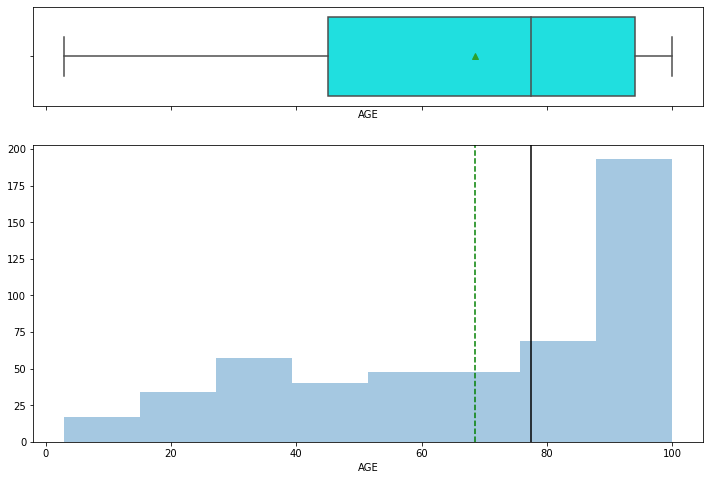

In [30]:
# Build the histogram boxplot for AGE(Proportion of owner-occupied units built before 1940):
histogram_boxplot(df1['AGE'])

### Inference:
1. The AGE plot is left skewed.
2. The mean proportion of buildings of a town which are owner occupiedaa and built before 1940 is 60%. some town does have 100%
proportion occupied by owners and built before 1940.

Skew: 1.01


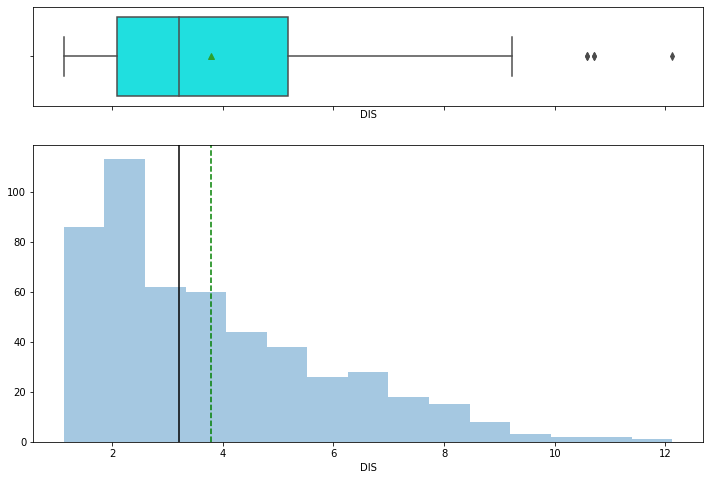

In [31]:
# Build the histogram boxplot for DIS(Weighted distances to five Boston employment centers):
histogram_boxplot(df1['DIS'])

### Inference:
1. The DIS boxplot is rightly skewed.
2. The average distance of the house from the five employmemt centres is ~3.8 miles but median distance of the towns or suburbs is ~2.5 miles.
3. Some houses are located beyond 10 mile from these employment centres.

Skew: 1.0


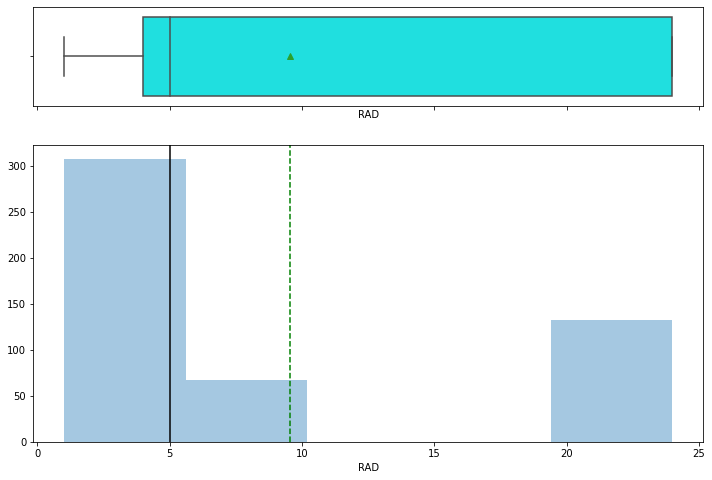

In [33]:
# Build the histogram boxplot for RAD(Index of accessibility to radial highways):
histogram_boxplot(df1['RAD'])

### Inference:
1. The curve is right skewed.

Skew: 0.67


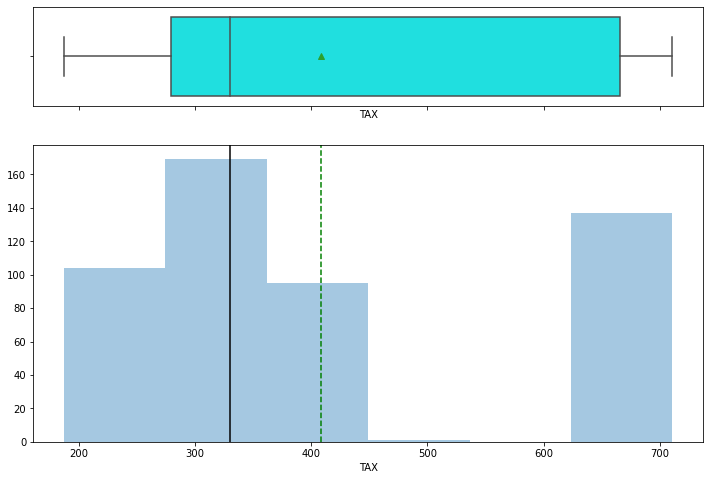

In [35]:
# Build the histogram boxplot for TAX(Full-value property-tax rate per 10,000 dollars):
histogram_boxplot(df1['TAX'])

### Inference:
1.The curve is slightly right tilted and the Mean TAX is ~$408 but majority of the houses pay around $350 in taxes.

Skew: -0.8


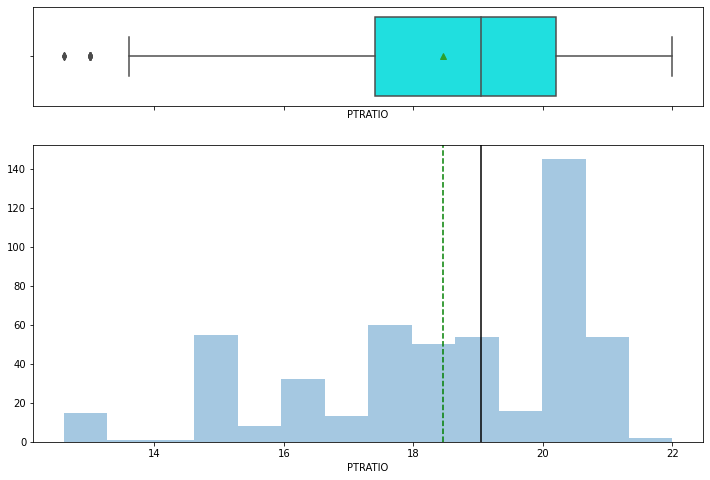

In [36]:
# Build the histogram boxplot for PTRATIO(Pupil-teacher ratio by town):
histogram_boxplot(df1['PTRATIO'])

### Inference:
1. The PTRATIO curve is slightly left side tilted. There are some (very few) houses in the locality which are falling in outliers i.e. below 1st quantile.
2. The mean and median PTRATIO is above 18 which could be a potential determinant for the housing prices

Skew: 0.91


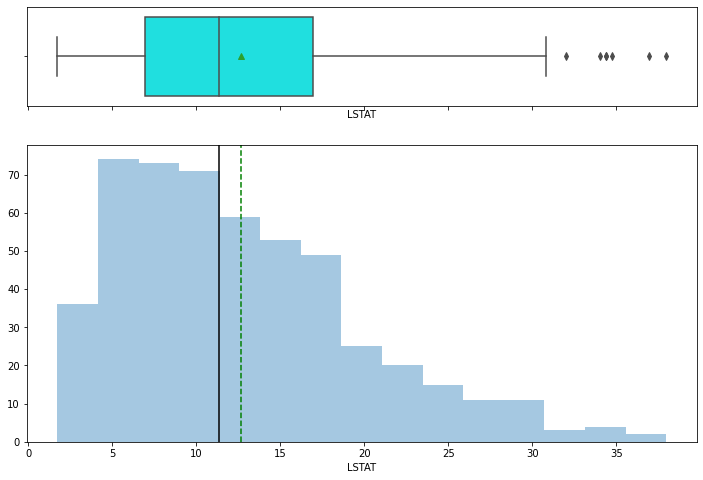

In [37]:
# Build the histogram boxplot for LSTAT(% lower status of the population):
histogram_boxplot(df1['LSTAT'])

Skew: 1.11


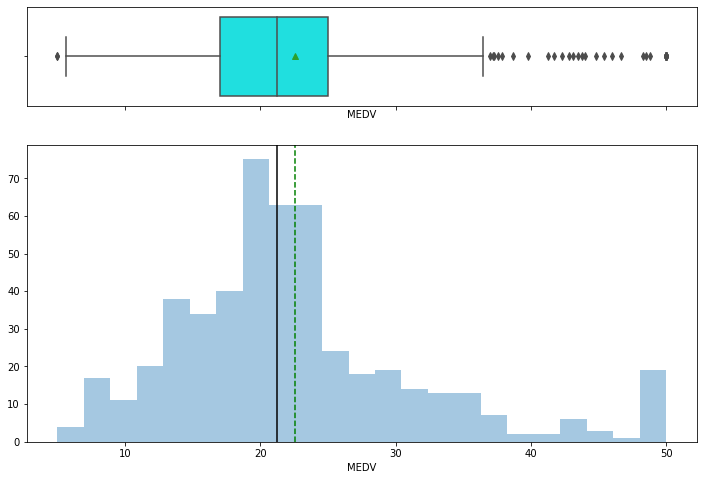

In [38]:
# Build the histogram boxplot for MEDV(Median value of owner-occupied homes in 1000 dollars):
histogram_boxplot(df1['MEDV'])

### Inference:
1. The MEDV curve is almost normally distrubuted with right side tilt and many outliers on the right hand side. Some outliers at    the left hand side too.
2. The Median and mean value of owner-occupied houses are ~22k dollars. There are some houses for which this value is ~50k.
3. To remove the right hand side tilt let us take the log of MEDV

In [117]:
df1['MEDV_log']= np.log(df1.MEDV)

Skew: -0.33


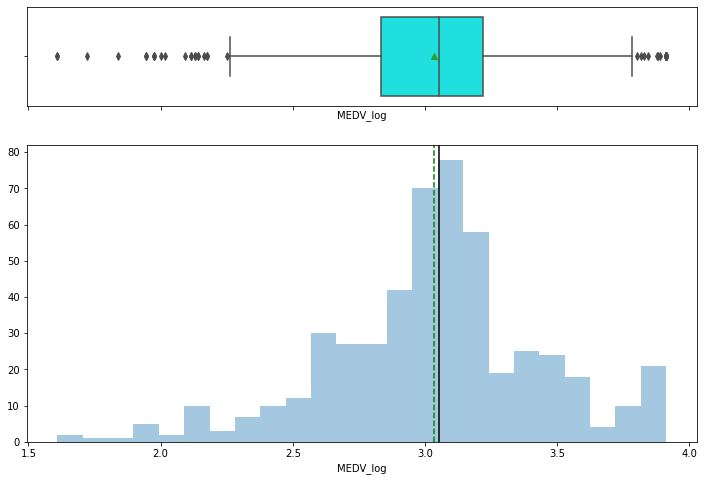

In [119]:
histogram_boxplot(df1['MEDV_log'])

#### Inference:
1. The log of MEDV values ahs reduced the variance of all the values and hence the curve has become almost normally distributed with mean and median almost similar.

## Bivariate Analysis
Bivariate Analysis: Continuous and Categorical Variables

Analyze CHAS vs some continuous variables:

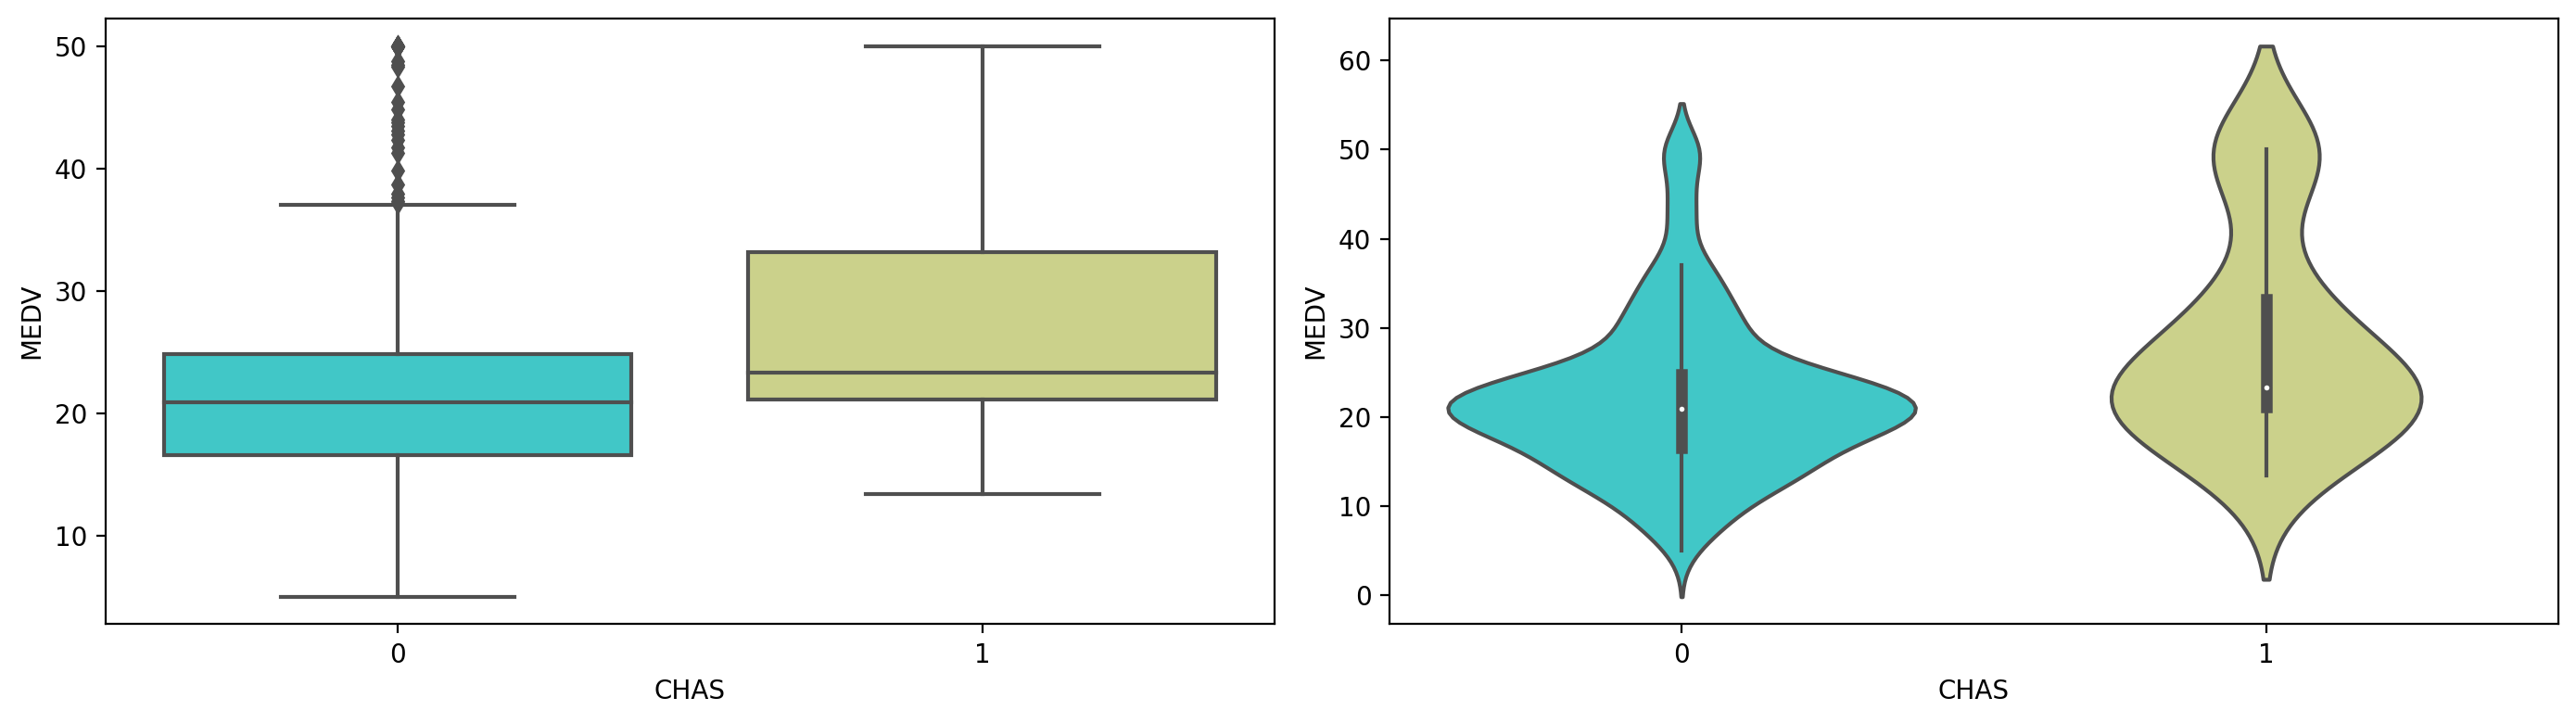

In [41]:
plt.figure(figsize=(14,4),dpi=200)
plt.subplot(1,2,1)
sns.boxplot(df1["CHAS"],df1['MEDV'],palette="rainbow");
plt.subplot(1,2,2)
sns.violinplot(df1["CHAS"],df1['MEDV'],palette="rainbow")
plt.tight_layout()

### Inferences:
1. The median value of those houses around Charles river has high MEDV value compared to those houses not around the river.
2. The 1st quantile of the houses around Charles river has MEDV value around 2nd quantile of the houses not around Charles River.

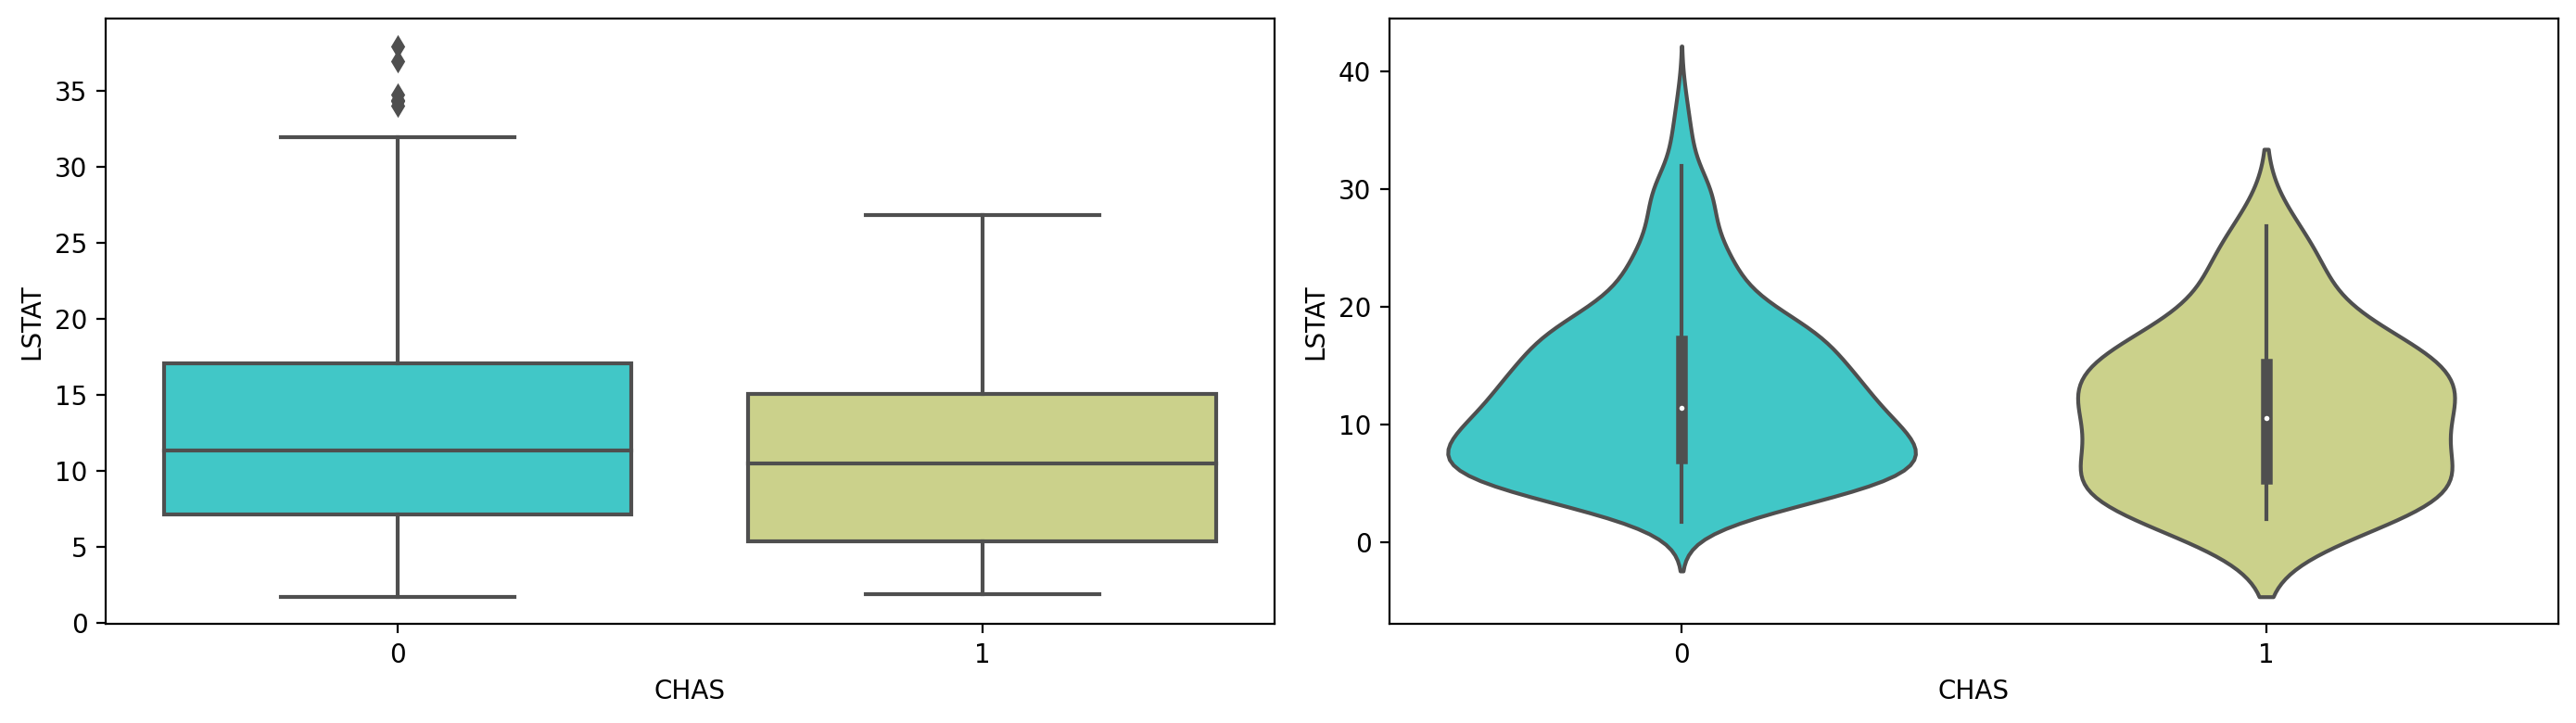

In [43]:
plt.figure(figsize=(14,4),dpi=200)
plt.subplot(1,2,1)
sns.boxplot(df1["CHAS"],df1['LSTAT'],palette="rainbow");
plt.subplot(1,2,2)
sns.violinplot(df1["CHAS"],df1['LSTAT'],palette="rainbow")
plt.tight_layout()

### Inference:
1. Median value of those houses around Charles River have lower proportion of population having lower status of the population      compared to median of those houses not situated around the river.

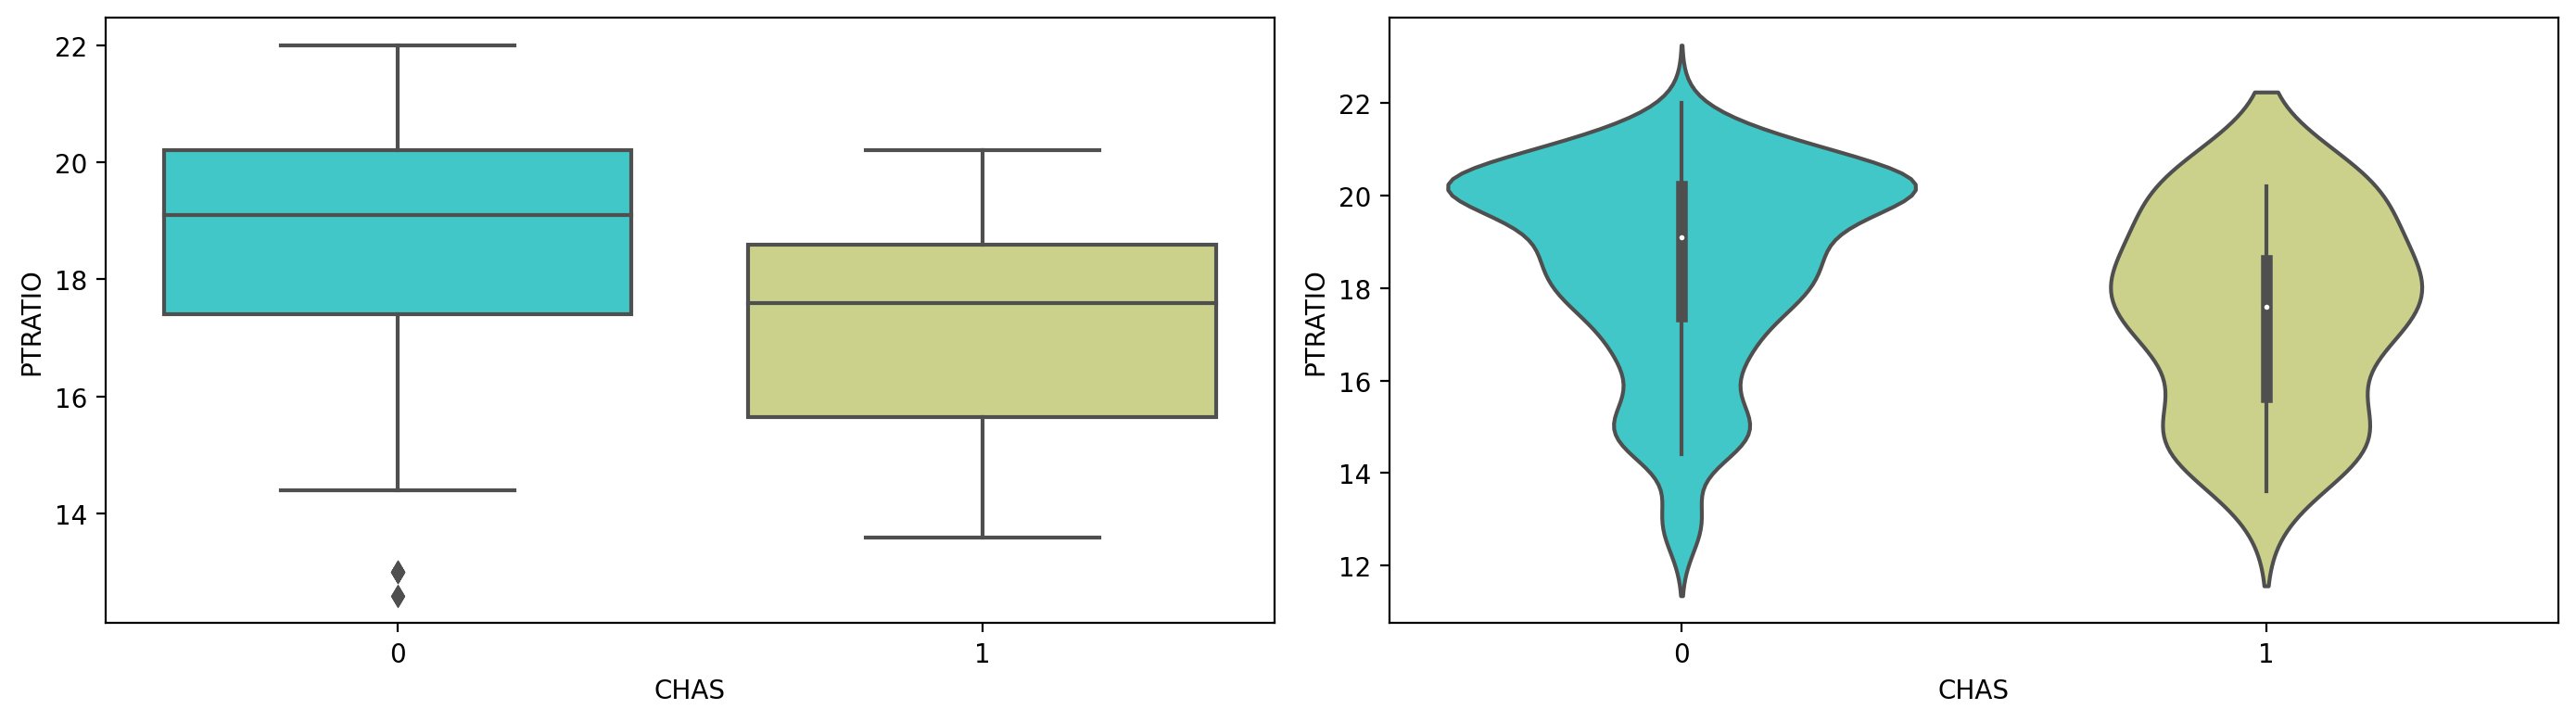

In [44]:
plt.figure(figsize=(14,4),dpi=200)
plt.subplot(1,2,1)
sns.boxplot(df1["CHAS"],df1['PTRATIO'],palette="rainbow");
plt.subplot(1,2,2)
sns.violinplot(df1["CHAS"],df1['PTRATIO'],palette="rainbow")
plt.tight_layout()

### Inferences:
1. It is surprising that the median no of houses situated around River Charles have PTRATIO way lower than median value of those houses which are not sutuated
around the river.

##### THink whether this result is due to the unbalanced weights of both kind oh houses where majority of the houses belong to the other category i.e. not situated around charles river.

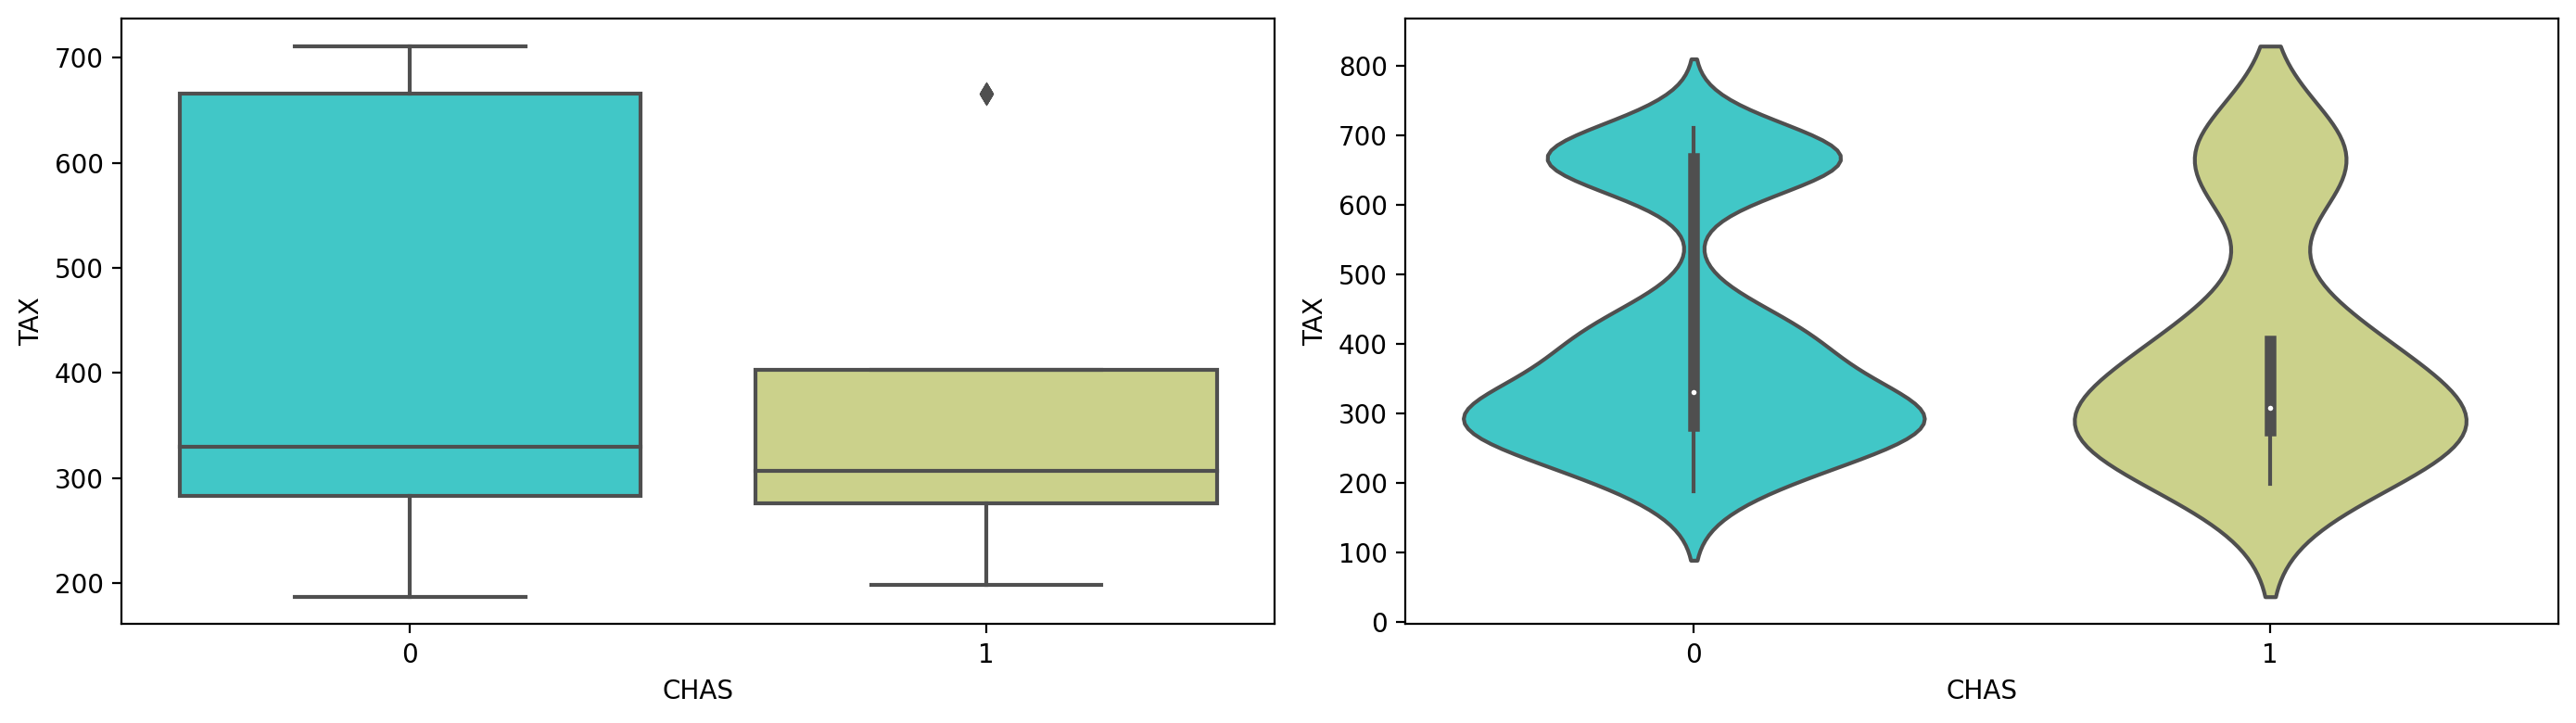

In [47]:
plt.figure(figsize=(14,4),dpi=200)
plt.subplot(1,2,1)
sns.boxplot(df1["CHAS"],df1['TAX'],palette="rainbow");
plt.subplot(1,2,2)
sns.violinplot(df1["CHAS"],df1['TAX'],palette="rainbow")
plt.tight_layout()

### Inference:
1. The median value of taxes around Charles river is lesser than the houses noy sitated around the Charles River.

Think about the unbalanced weights???

## Analyze CHAS vs numerical variables

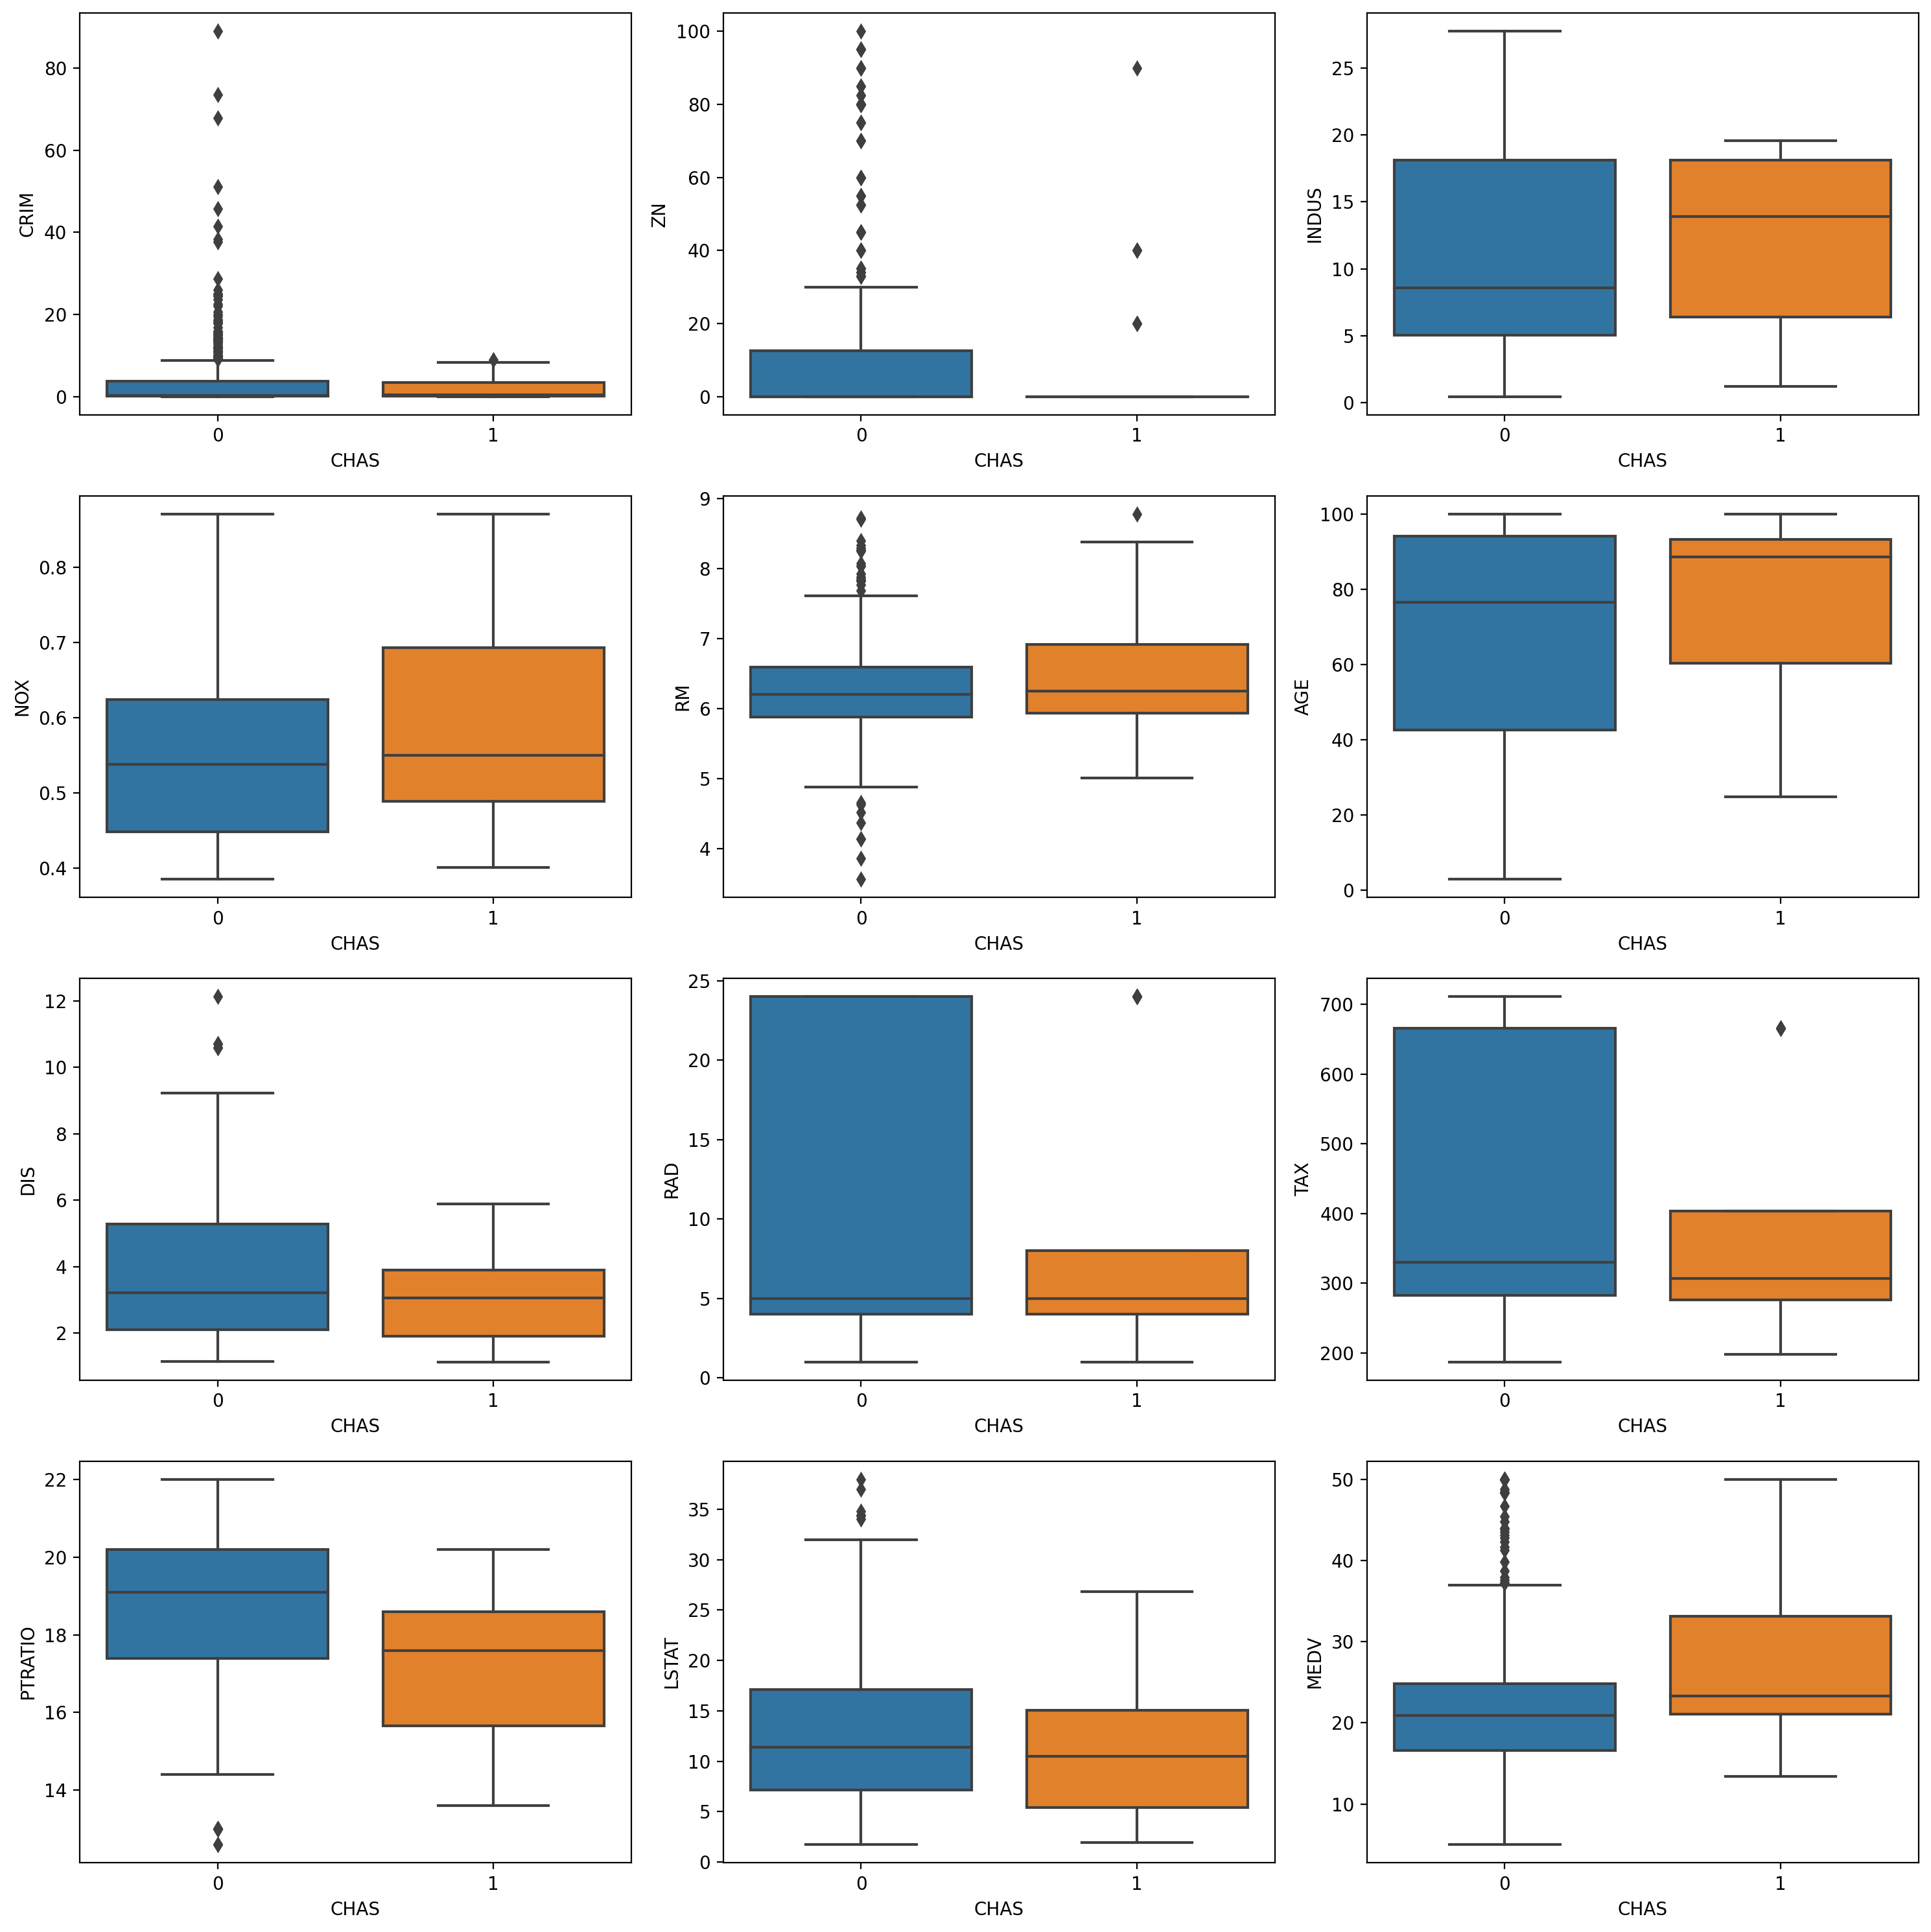

In [50]:
rows = 4
cols = 3
fig = plt.figure(figsize= (15,15),dpi=200)

#num_cols=['LOAN','MORTDUE','VALUE','YOJ','CLAGE','CLNO','DEBTINC','NINQ']

for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.boxplot(df1['CHAS'],df1[col], ax=ax)
    
fig.tight_layout()
plt.show()

### Inferences:
1. Nitric Oxide concentration is (median value) more in those houses which are near Charles River and vice versa
2. Median distance of the houses around Charles River from the Boston Employment centre is lesser compared to thise houses which are not around charles river
3. Houses around Charkes River are older and more owner-occupied compared to the houses which are not surrounding Charles River.


## Bivariate Analysis: Two Continuous Variables

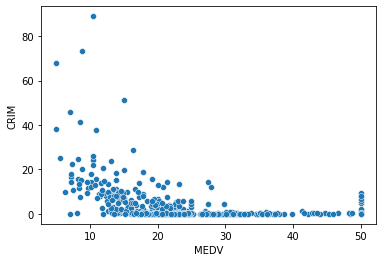

In [121]:
sns.scatterplot(df1["MEDV"],df1['CRIM'],palette="PuBu");

#### Note: As shown above, perform Bivariate Analysis on different pairs of continuous variables

<Figure size 5000x5000 with 0 Axes>

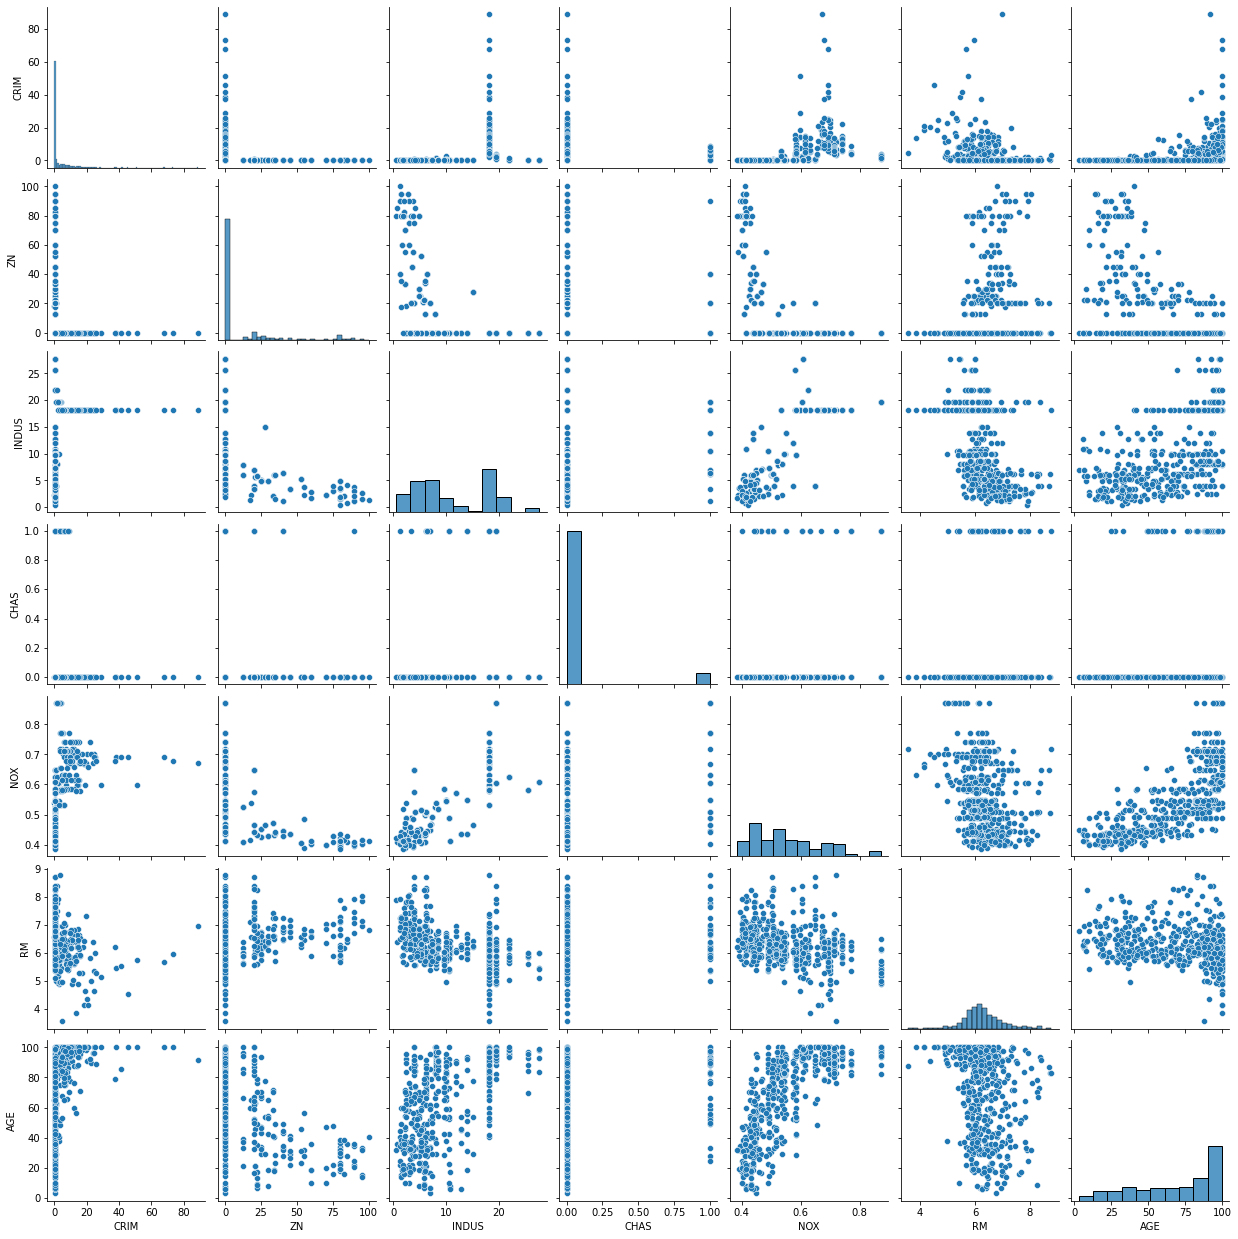

In [122]:
# Create slices of original dataframe having only continuous variables
df_con=df1.select_dtypes(include='number')
df_con1=df1.iloc[:,:7]
df_con2=df1.iloc[:,7:]

# Let's create pairplots of continuous variables for these sliced dataframes one by one 
# so that we aren't bombarded with too many pairplots at once 
plt.figure(figsize=(25,25),dpi=200)
sns.pairplot(df_con1);

#### Inference:
1. There is a correlation between CRIM and RM
2. There is a weaker correlation between NOX and ZN
3. There is a weaker correlation between CRIM and NOX

<Figure size 5000x5000 with 0 Axes>

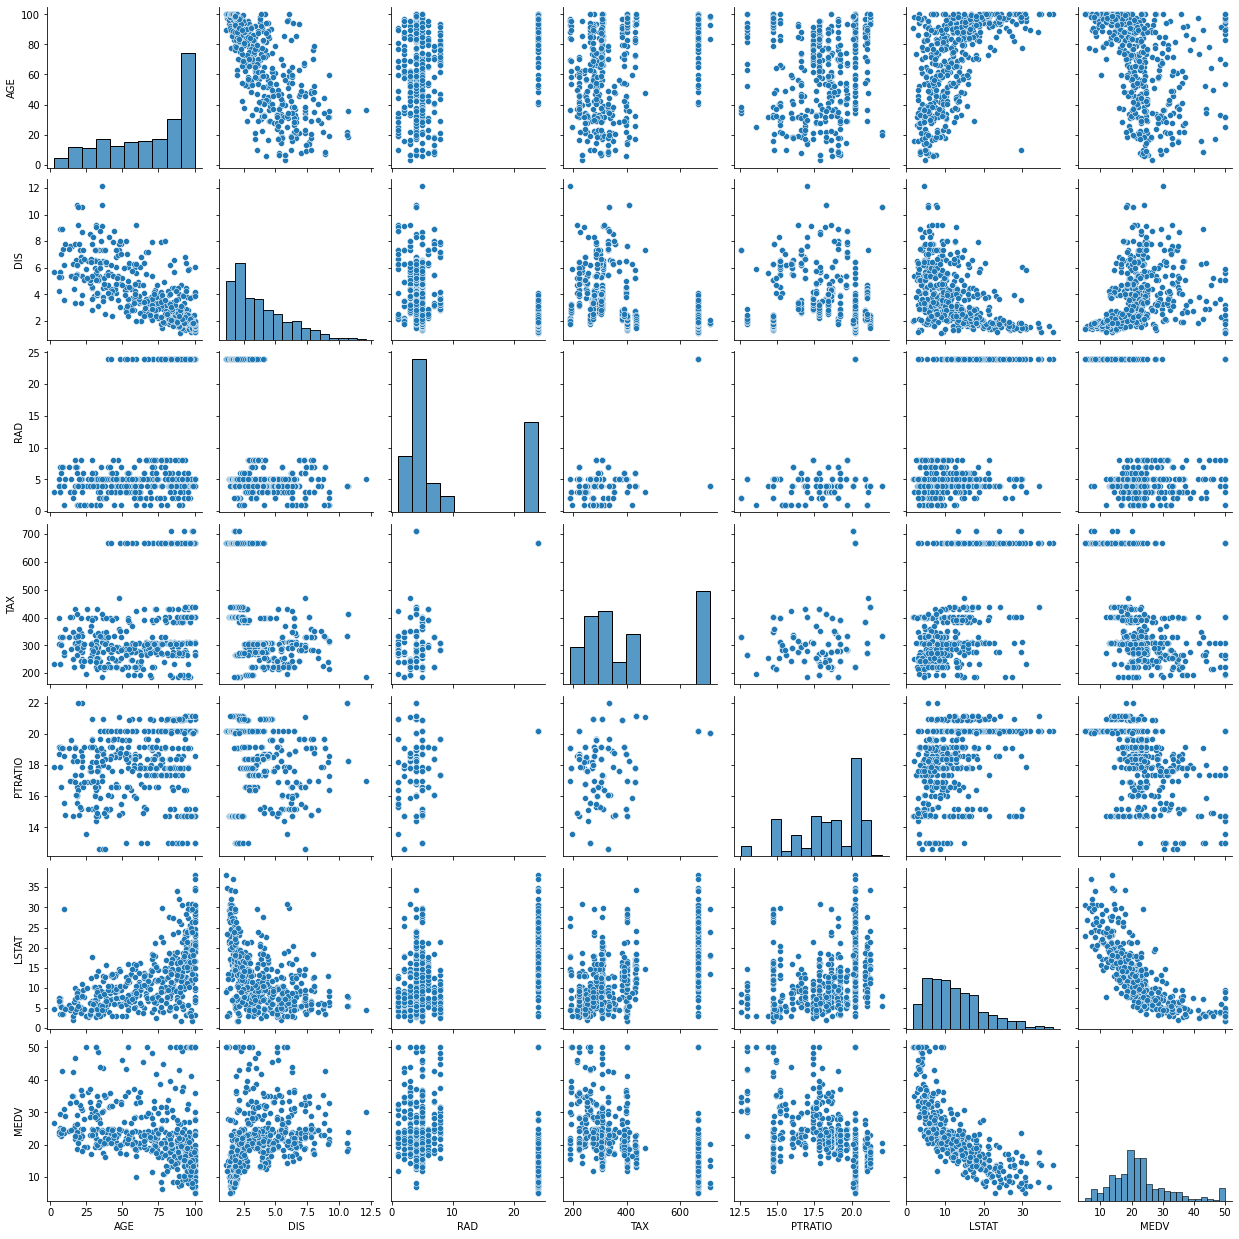

In [58]:
plt.figure(figsize=(25,25),dpi=200)
sns.pairplot(df_con2)

#### Inference:
1. There is a negative correlation between MDEV and LSTAT
2. There is a negative correlation between DIS and MDEV
3. There is this negative correlation between AGe and MEDV i.e. older the owner occupied houses nearer they would had been to the employment centres or employment centres would have been created around such old settlements with owner occupied homes built before 1940.

## Multivariate Analysis

Analyze Correlation Heatmap for Numerical Variables

In [123]:
df2= df1.drop(['MEDV', 'MEDV_log'],axis= 1)

In [124]:
df3= df2.drop(['CHAS'], axis= 1)

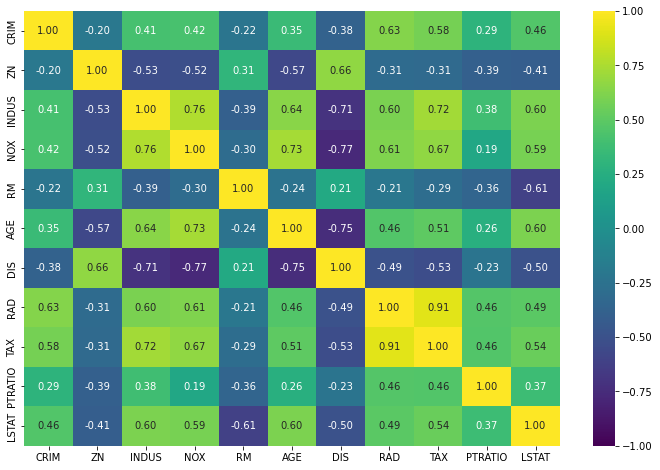

In [125]:
# Build correlation matrix for numerical columns
corr = df3.corr()

# plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='viridis',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True);

### Inference:
1. Very strong positive correlation between TAX and RAD (.91). We need to be careful while modelling and using them as two independent variables.This could have been because of outliers too which are present in TAX column. One way is to remove extreme values and reeplace them with zero. 
2. Strong positive correlation between TAX & INDUS and DIS & ZN
3. Strong positive correlation between DIS & ZN, INDUS & NOX, NOX & AGE, NOXa & RAD and NOX & TAX.

#### Test the correlation between TAX and RAD:
1. As seen from the pair plot there was no trend or pattern found between the two but there exist a very high correlation of 0.9 that means this value is due to the outliers in tAX. Let us remove some of the high tax rate greater than $600 (based on the box plot of TAX) and then find the correlation between TAX and RAD.

In [130]:
# Remove the data corresponding to high tax rate
df2 = df1[df1['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df2['TAX'], df2['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


That means the high correlation between both of them was due to outliers of TAX columns which have been removed.

# Modeling

Now, that we have analyzed all the variables in the dataset, we are ready to start building the model. We have observed that not all the independent variables are important to predict the outcome variable. But at the beginning, we will use all the variables, and then from the model summary, we will decide on which variable to remove from the model. Model building is an iterative task.

In [134]:
# And then we are putting the outcome variable MEDV separately:
y = df1['MEDV_log']

# We are removing the outcome variable from the feature set which is MEDVa and MEDV_log. I will use data set df1 only
X = df1.drop(columns = {'MEDV', 'MEDV_log'})



Whenever we have categorical variables as independent variables, we need to create **one hot encoded** representation (which is also known as dummy variables) of those categorical variables. The below code is creating dummy variables and we are removing the first category in those variables, known as **reference variable**. The reference variable helps to interpret the linear regression which we will see later.

In [137]:
# Train-Test Split: 70:30:

# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

,const,CRIM,CHAS,NOX,RM,DIS,RAD,PTRATIO,LSTAT
13,1.0,0.62976,0,0.538,5.949,4.7075,4,21.0,8.26
61,1.0,0.17171,0,0.453,5.966,6.8185,8,19.7,14.44
377,1.0,9.82349,0,0.671,6.794,1.3580,24,20.2,21.24
39,1.0,0.02763,0,0.428,6.595,5.4011,3,18.3,4.32
365,1.0,4.55587,0,0.718,3.561,1.6132,24,20.2,7.12
...,...,...,...,...,...,...,...,...,...
255,1.0,0.03548,0,0.392,5.876,9.2203,1,16.4,9.25
72,1.0,0.09164,0,0.413,6.065,5.2873,4,19.2,5.52
396,1.0,5.87205,0,0.693,6.405,1.6768,24,20.2,19.37
235,1.0,0.33045,0,0.507,6.086,3.6519,8,17.4,10.88


## Building the Linear REgression Model on Train Data-set:

#### Now, as the dataset is ready, we are set to build the model using the **statsmodels** package

In [188]:
# Adding the intercept term
X_train = sm.add_constant(X_train)

X_test= sm.add_constant(X_test)

# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(y_train, X_train)

# Fitting the Model
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     97.19
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          3.27e-102
Time:                        22:48:35   Log-Likelihood:                 80.575
No. Observations:                 354   AIC:                            -135.1
Df Residuals:                     341   BIC:                            -84.85
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6856      0.241     19.404      0.0

### **Observations:**

- We can see that the **R-squared** for the model is **0.774**. 
- Some of the variables are statistically significant to predict the outcome variable. To check which variables are statistically significant or have predictive power to predict the target variable, we need to check the **p-value** against all the independent variables.
- Variables like ZN, INDUS, AGE, TAX, CHAS needs to be verified further as for them P value is significant.

**Interpreting the Regression Results:**

1. **Adj. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adjusted R-squared is **0.766**. which is slightly lower than the R-squared.

2. **coeff**: It represents the change in the output Y due to a change of one unit in the independent variable (everything else held constant).
3. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the more accurate the coefficients are.
4. **P >|t|**: It is the p-value.
   
   * Pr(>|t|) : For each independent feature, there is a null hypothesis and alternate hypothesis.

    Ho : Independent feature is not significant. 
   
    Ha : Independent feature is significant. 
    
   * The p-value of less than 0.05 is considered to be statistically significant with a confidence level of 95%. 

   
5. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

Based on the above analysis, if we observe the above model summary, we can see only  INDUS and AGE have a p-value greater than 0.05.


## **Feature Selection**

### **Removing Multicollinearity**

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between independent variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is the Variation Inflation Factor.

* **Variance Inflation factor**:  Variance inflation factor measures the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors.  It is a measure of how much the variance of the estimated regression coefficient βk is “inflated” by the existence of correlation among the predictor variables in the model. 

* General Rule of thumb: If VIF is 1, then there is no correlation between the kth predictor and the remaining predictor variables, and hence the variance of β̂k is not inflated at all. Whereas, if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeds 10, it shows signs of high multicollinearity.

In [139]:
# Function to check VIF:

vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index = X_train.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      535.372593
CRIM         1.924114
ZN           2.743574
INDUS        3.999538
CHAS         1.076564
NOX          4.396157
RM           1.860950
AGE          3.150170
DIS          4.355469
RAD          8.345247
TAX         10.191941
PTRATIO      1.943409
LSTAT        2.861881
dtype: float64



TAX and RAD has a high VIF score. Hence, we are dropping TAX and checking the collinearity again.

In [140]:
X_train_new = X_train.drop("TAX", axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])],
    index = X_train_new.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      532.025529
CRIM         1.923159
ZN           2.483399
INDUS        3.270983
CHAS         1.050708
NOX          4.361847
RM           1.857918
AGE          3.149005
DIS          4.333734
RAD          2.942862
PTRATIO      1.909750
LSTAT        2.860251
dtype: float64



Now, all the attributes VIF values are below 5 that means they are not highly coolinear.

let's build the model and observe the p-values.

In [144]:
ols_model_1 = sm.OLS(y_train, X_train_new)

ols_res_1 = ols_model_1.fit()

In [145]:
print(ols_res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          1.40e-101
Time:                        18:44:16   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.0

Age, ZN, INDUS and RN are still very significant in terms of p.value. Let's drop AGE first and see how the model works.

In [146]:
X_train_new1 = X_train_new.drop("AGE", axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])],
    index = X_train_new1.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      530.862035
CRIM         1.923131
ZN           2.456288
INDUS        3.270981
CHAS         1.049704
NOX          4.104876
RM           1.791130
DIS          3.948746
RAD          2.920108
PTRATIO      1.898539
LSTAT        2.464539
dtype: float64



In [148]:
ols_model_2 = sm.OLS(y_train, X_train_new1)

ols_res_2 = ols_model_2.fit()

print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     113.9
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          1.42e-102
Time:                        18:52:12   Log-Likelihood:                 76.486
No. Observations:                 354   AIC:                            -131.0
Df Residuals:                     343   BIC:                            -88.41
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6272      0.243     19.079      0.0

INDUS, ZN, RM are showing high p-value. Let's drop INDUS, ZN and see the model performance

In [150]:
X_train_new2 = X_train_new1.drop(["INDUS",'ZN'], axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])],
    index = X_train_new2.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      526.961418
CRIM         1.892679
CHAS         1.049602
NOX          3.528194
RM           1.748438
DIS          2.582254
RAD          2.838523
PTRATIO      1.591527
LSTAT        2.437311
dtype: float64



In [151]:
ols_model_3 = sm.OLS(y_train, X_train_new2)

ols_res_3 = ols_model_3.fit()

print(ols_res_3.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          2.61e-104
Time:                        18:56:10   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.0

### Inference:
1. Now all the variables are statisticalli significant i.e. p-value is less than 0.005. That means we can reject the null hypothesis and we can write the output variable in terms of linear function of the above independent variable.

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### 1. **Mean of residuals should be 0 and normality of error terms**

In [153]:
# Residuals
residual = ols_res_3.resid
residual.mean()

-1.549921521948453e-15

- The mean of residuals is very close to 0 (as we have e to the power -15). Hence, the corresponding assumption is satisfied.

### **2. No Heteroscedasticity

- **Homoscedasticity** - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- **Heteroscedasticity**- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `**Goldfeldquandt Test**` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [155]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [156]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train_new2)

lzip(name, test)

[('F statistic', 1.0835082923425285), ('p-value', 0.3019012006766869)]

Here p-value is 0.3 hence we failed to reject the null hypothesis of the Goldfeld-Quandt test then heteroscedasticity is not present in the data set.

### 3. Linearity of variables

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

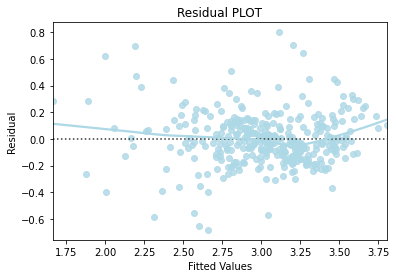

In [167]:
# Predicted values
fitted = ols_res_3.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y= residual, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

We did not find any pattern for the residuals, hence the predictor variables must have a linear relation with the dependent variables.

### **4. Normality of error terms**

The residuals should be normally distributed.

Skew: -0.65


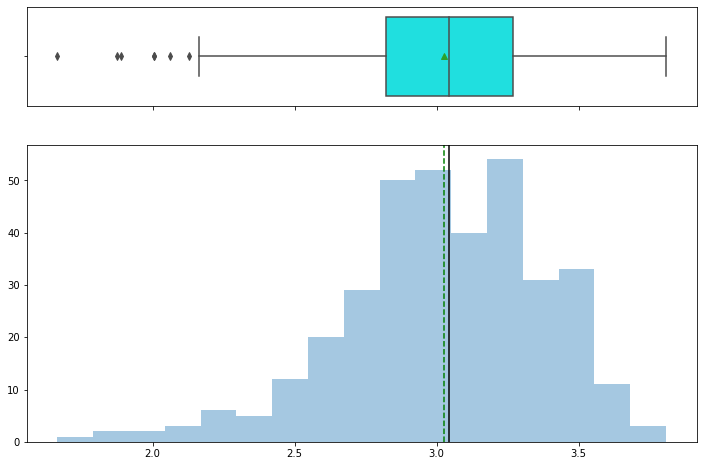

In [166]:
histogram_boxplot(fitted)

#### Observations:
1. The histogram plot of the residual is almost normally distributed with slight left hand side tilt and mean and median are almost colliding.

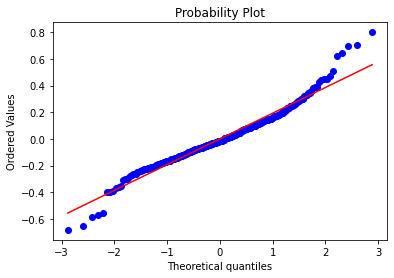

In [168]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residual, dist = "norm", plot = pylab)

plt.show()

### **Check the performance of the model on the train and test data set**

In [174]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance

In [179]:
X_test.shape

(152, 12)

In [192]:
# Let us make the shape of X_test comparable to X_train_new2 by removing four attributes 'TAX', 'ZN', 'AGE', 'INDUS':
X_test1= X_test.drop(["TAX",'ZN','INDUS','AGE'], axis = 1)

In [194]:
# Use the above function to calculate all kinds of error
model_pref(ols_res_3, X_train_new2, X_test1)

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


#### Observations:

In general, the low errors above give a positive impression about the model's accuracy.
We can see that the errors have increased slightly on the test data. This suggested further investigation to improve the performance on general data. Hence we are going for coss-validation of the given data.

In [197]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train_new2, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train_new2, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


#### Observations:

1. The R-squared on the cross validation is 0.729, whereas on the training dataset it was 0.769
2. And the MSE on cross validation is 0.041, whereas on the training dataset it was 0.038

We may want to reiterate the model building process again with new features or better feature engineering to increase the R-squared and decrease the MSE on cross validation.

###  ** Get model Coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs. (4 Marks)

**Hint:** To get values please use coef.values

In [199]:
coef = pd.Series(index = X_train_new2.columns, data = ols_res_3.params.values)
coef_df = pd.DataFrame(data = {'Coefs': ols_res_3.params.values }, index =  X_train_new2.columns)
coef_df

,Coefs
const,4.649386
CRIM,-0.012500
CHAS,0.119773
NOX,-1.056225
RM,0.058907
DIS,-0.044069
RAD,0.007848
PTRATIO,-0.048504
LSTAT,-0.029277


In [200]:
# Let us write the equation of the fit
Equation = "log (Price) ="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) =	( 4.649385823266638 ) *  const + ( -0.012500455079103887 ) *  CRIM + ( 0.1197731907701965 ) *  CHAS + ( -1.0562253516683255 ) *  NOX + ( 0.058906575109279824 ) *  RM + ( -0.044068890799405055 ) *  DIS + ( 0.00784847460624381 ) *  RAD + ( -0.048503620794999 ) *  PTRATIO + ( -0.029277040479796866 ) *  LSTAT + 

### Conclusion:
1. From the equation we can derive that, the prices go high for houses located near Charles river and housed with many rooms.
2. The prices are negatively affected mostly by the oxide concentration which is mostly high in employeement centers. Crime        rates, NOX value and residents profile also negatively affects prices.